# Разведочный анализ данных 

### Цель работы 

Продемонстрировать навыки владения необходимыми инструментами для проведения разведочного анализа данных (EDA) на примере компании Kiva.

### Результат 

Файл формата .ipynb, показывающий уровень владения инструментами для разведочного анализа данных.

### Описание данных

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном, деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Kiva помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).



In [1]:
# Импортируем необходимые библиотеки 

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set2')

In [2]:
# Загружаем данные 

df_kiva_loans = pd.read_csv('kiva_loans.csv')
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv')

In [3]:
# Посмотрим на первые три строки каждого из датасетов 

df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Данные загрузились корректно. Далее посмотрим, присутствуют ли в них пропуски. 

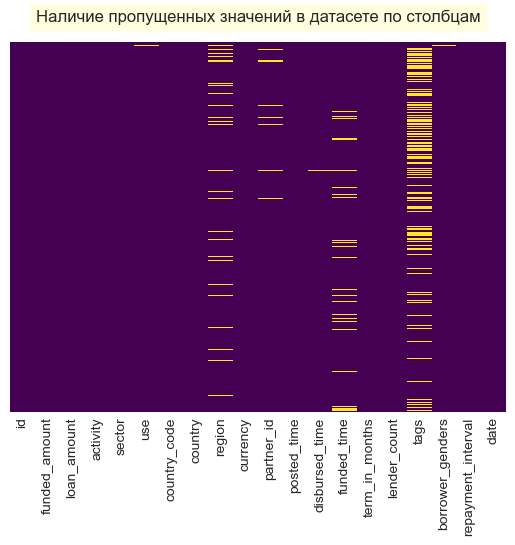

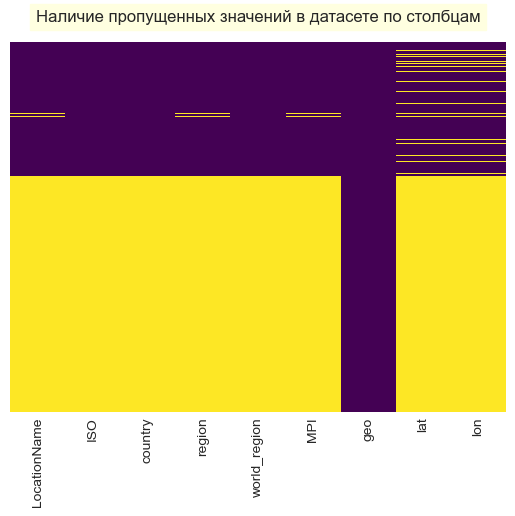

In [5]:
for i_data in [df_kiva_loans, df_mpi]:
    
    fig, ax = plt.subplots()
    sns.heatmap(i_data.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')
    ax.set_title('Наличие пропущенных значений в датасете по столбцам', pad=15, backgroundcolor='lightyellow')
    plt.show()

Видим, что в некоторых колонках присутствуют пропуски. Помимо визуализации, наличие пропусков можно отследить с помощью метода ```info()```. Применим этот метод к таблицам и сравним число ненулевых значений каждого признака с количеством строк датасетов.

In [6]:
for i_data in [df_kiva_loans, df_mpi]:
    i_data.info()
    print(i_data.isna().sum())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки. Так как пропусков в данных немного, удалим строки, содержащие пропущенные значения.

In [7]:
for i_data in [df_kiva_loans, df_mpi]:
    i_data.dropna(inplace=True)
    print('\n')

Теперь, когда данные подготовлены, перейдем к постановке гипотез и их проверке.

Используя таблицу ```df_kiva_loans```, попробуем найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит (**lender_count**) и суммой займа (**loan_amount**).

**Для этого**:

1. Выделим три указанных столбца в отдельную таблицу `df_temp`.
2. Найдём корреляцию между признаками с помощью команды `df_temp.corr()`, сохраним полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируем полученный результат`.

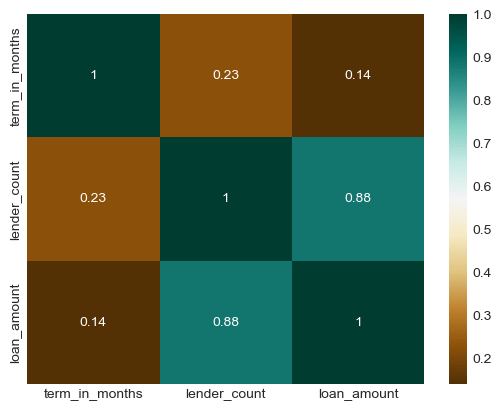

In [8]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]

df_corr = df_temp.corr()
sns.heatmap(df_corr, cmap = 'BrBG', annot=True);

Глядя на тепловую карту и анализируя полученные коэффициенты корреляции, можно сделать следующие выводы: 
1) Существует довольно сильная связь между такими признаками, как lender_count (количество кредиторов, 
   которые внесли свой вклад в этот кредит) и loan_amount (суммой займа). Можно предположить, что с 
   увеличением количества кредиторов увеличивается и сумма займа, а значит, для успешной реализации более 
   дорогостоящих проектов необходимо привлекать больше кредиторов. И наоборот, меньшие по объёму займы 
   требуют меньших вложений, а значит и количество кредиторов требуется меньшее.
2) Связь между term_in_months (сроком кредита) и lender_count (количеством кредиторов) небольшая - возможно, 
   её наличие связано с тем, что больше кредиторов = больше сумма кредита = больше срок кредита (то есть, 
   связь не прямая, но она есть).
3) Связи между term_in_months (сроком кредита) и loan_amount (суммой займа) практически нет. Это ставит под 
   сомнение предположение в пункте 2).

Проанализируем разброс показателя **funded_amount** путём построения визуализации. Иcпользуем метод `histplot` библиотеки `seaborn`.

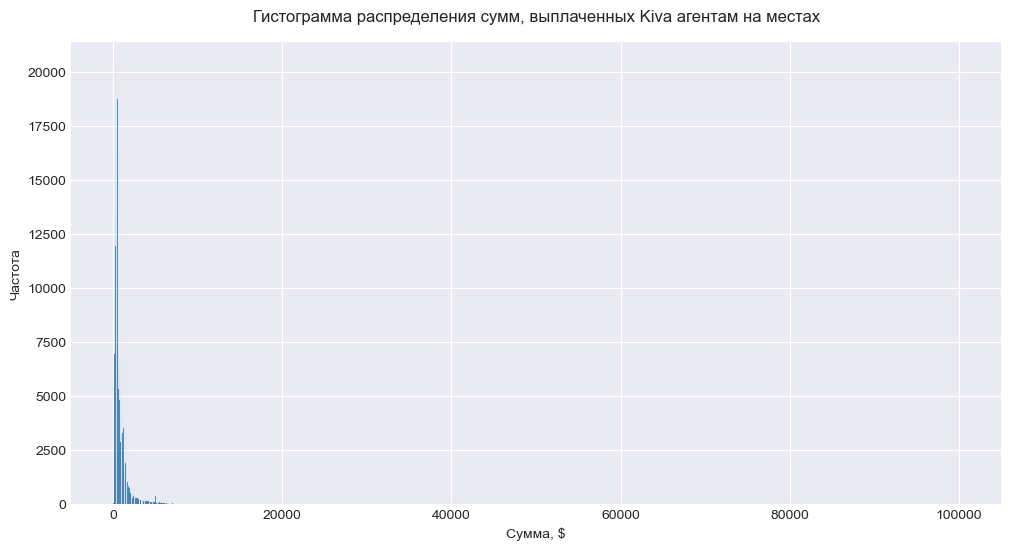

In [9]:
data_2 = df_kiva_loans['funded_amount'].reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=data_2, x='funded_amount')
ax.set_title('Гистограмма распределения сумм, выплаченных Kiva агентам на местах', pad=15)
ax.set_xlabel('Сумма, $')
ax.set_ylabel('Частота')
plt.show()

Дополнительно выделим суммы до 5000 включительно (так как это основная часть сумм), чтобы более подробно 
рассмотреть гистограмму.

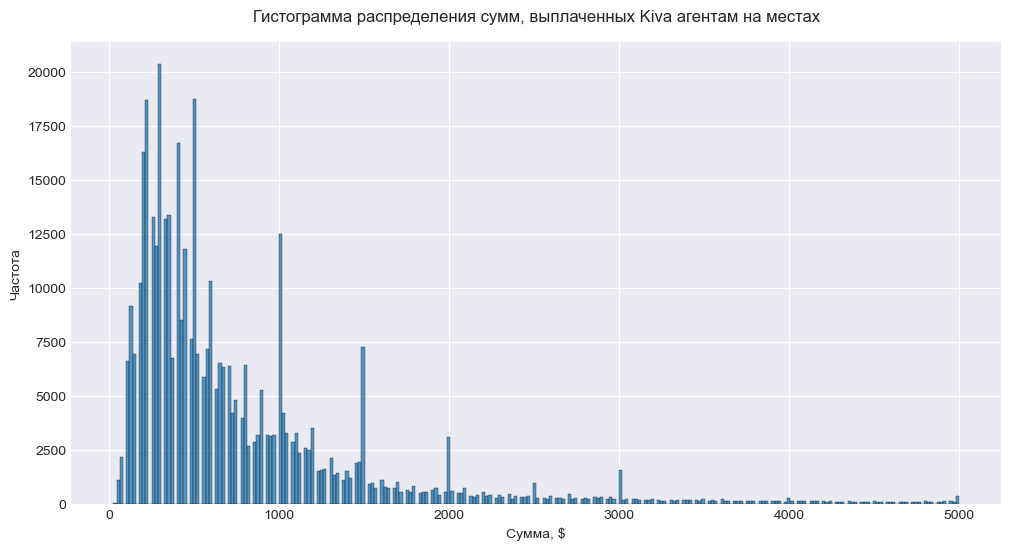

In [10]:
data_2 = df_kiva_loans[df_kiva_loans['funded_amount'] <= 5000].reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=data_2, x='funded_amount')
ax.set_title('Гистограмма распределения сумм, выплаченных Kiva агентам на местах', pad=15)
ax.set_xlabel('Сумма, $')
ax.set_ylabel('Частота')
plt.show()

Изучим несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

In [11]:
large_loan = df_kiva_loans[df_kiva_loans.loan_amount > 20000]

purposes = large_loan['use'].value_counts().head(15)
res_1 = purposes.head(15)
print(res_1)

To supply construction materials for a vocational training program.                                                                                                      2
to import and stock clean energy products such as solar lights or improved cookstoves                                                                                    2
to buy and plant resin producing pine trees. The resin will be harvested annually, providing income for many years                                                       2
To finish upgrading an alpaca fiber plant, creating jobs for local women and increased income in rural Peru                                                              1
to train 500 Tanzanian women in entrepreneurship and cosmetic sales so they can raise their income beyond $1/day                                                         1
to distribute solar home systems throughout rural Zimbabwe with pay-as-you-go credit                                                             

Если рассмотреть первые 15 назначений заявок, можно сделать вывод о том, что они, в отличие от заявок с 
более низкой суммой кредита, не направлены на удовлетворение первостепенных потребностей человека - в воде, 
еде, безопасности. Многие заявки направлены на создание или расширение рабочих мест, обучение, расширение 
бизнеса в целом или его усовершенствование с помощью новых технологий.

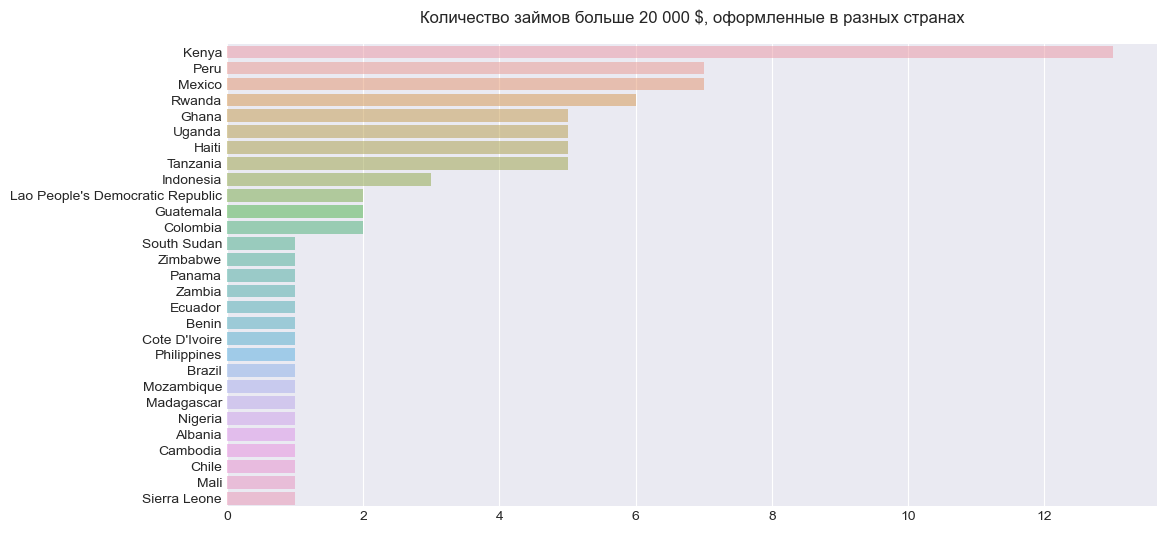

In [12]:
countries = large_loan['country'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=countries.values, y=countries.index, alpha=0.5)
ax.set_title('Количество займов больше 20 000 $, оформленные в разных странах', pad=15)
plt.show()

Самое большое количество займов с крупными суммами оформлено в Кении, Перу и Мексике.

Найдем топ-5 регионов по среднему уровню бедности. Для этого сгруппируем данные таблицы ```df_mpi``` по параметру **region** и найдём среднее значение **MPI** (многомерного индекса бедности) по группам.

In [13]:
res_mpi = df_mpi.groupby('region')['MPI'].mean().sort_values(ascending=False).reset_index().head(5)
res_mpi

,region,MPI
0,Lac,0.744
1,Wadi Fira,0.709
2,Sila,0.697
3,Kanem,0.696
4,Sahel,0.690


Построим диаграмму показателя **MPI** в разных странах (по среднему значению, медиане и моде).

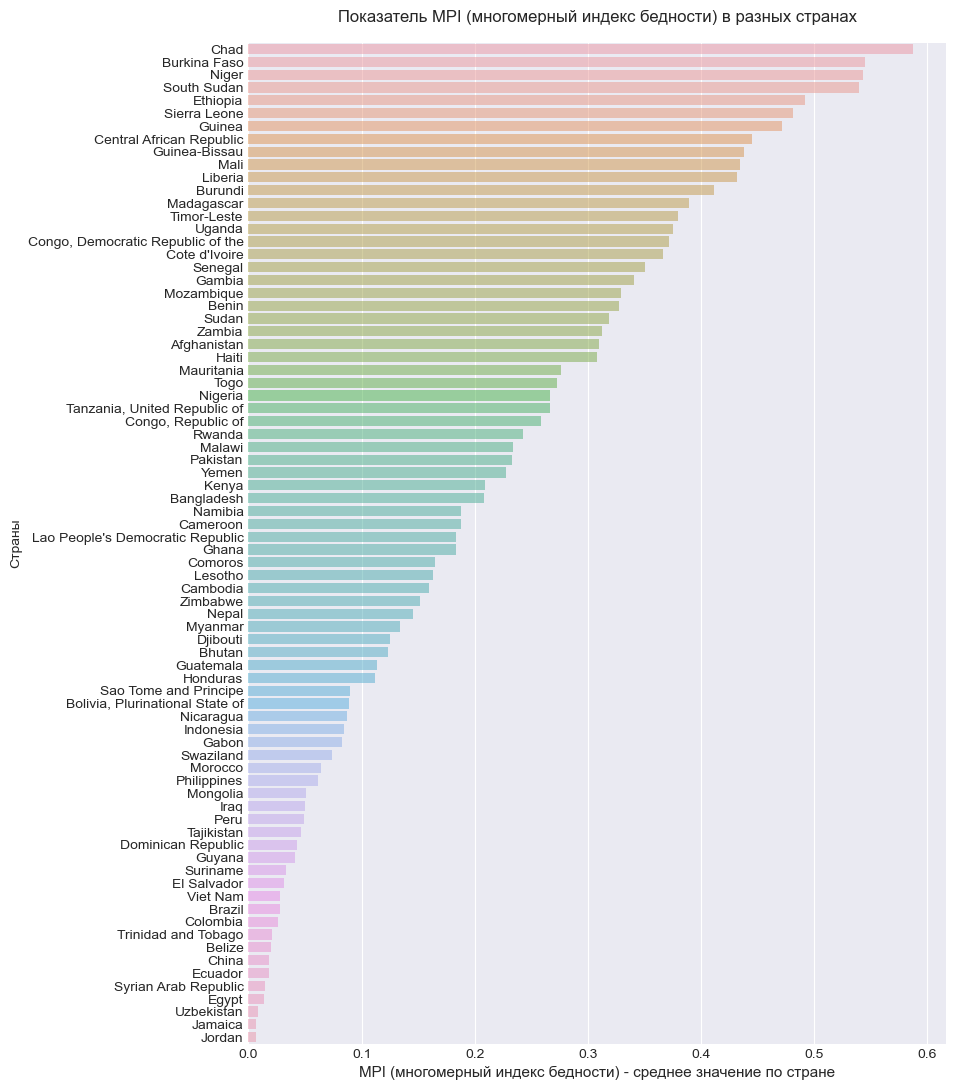

In [14]:
# По среднему значению 

result_1 = df_mpi.groupby('country')['MPI'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9, 13))

sns.barplot(x=result_1.values, y=result_1.index, alpha=0.5)
ax.set_title('Показатель MPI (многомерный индекс бедности) в разных странах', pad=15)
ax.set_xlabel('MPI (многомерный индекс бедности) - среднее значение по стране', fontsize=11)
ax.set_ylabel('Страны')

plt.show()

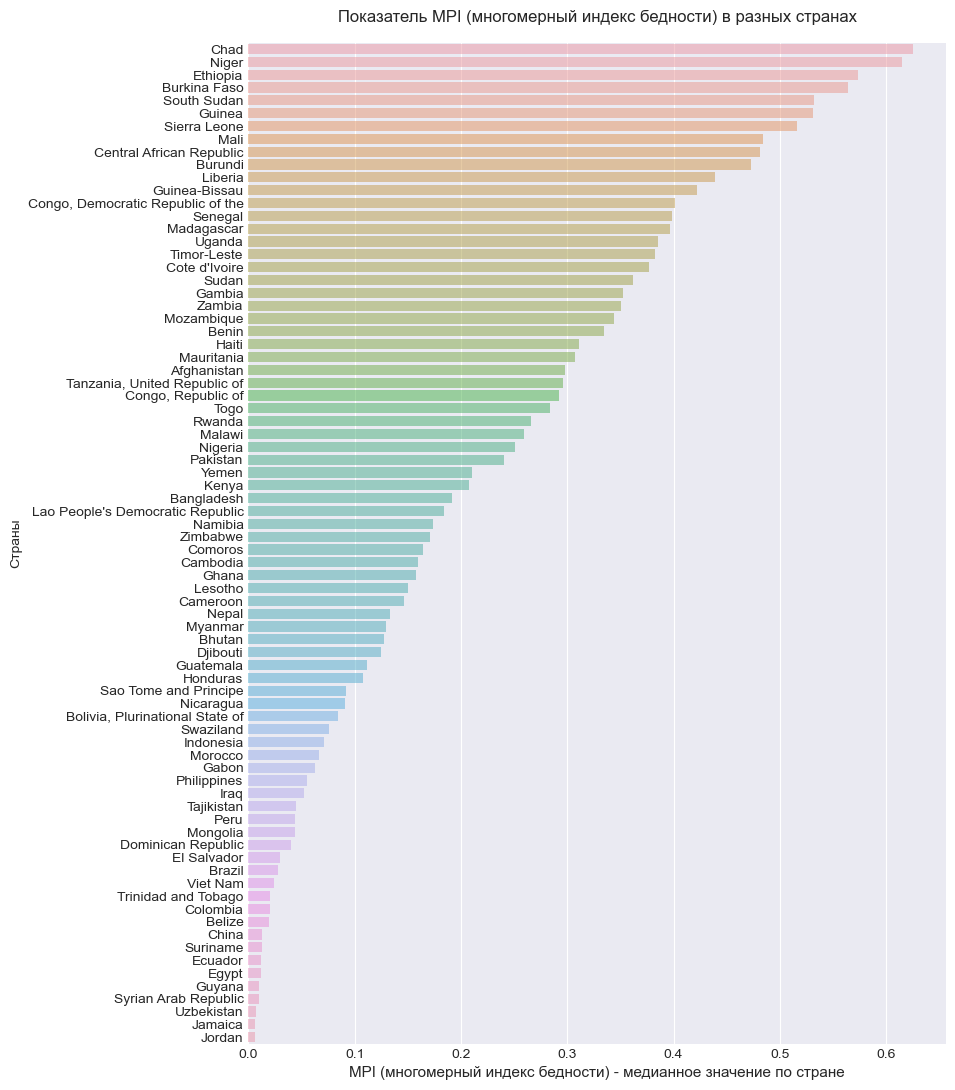

In [15]:
# По медиане 

result_2 = df_mpi.groupby('country')['MPI'].median().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9, 13))

sns.barplot(x=result_2.values, y=result_2.index, alpha=0.5)
ax.set_title('Показатель MPI (многомерный индекс бедности) в разных странах', pad=15)
ax.set_xlabel('MPI (многомерный индекс бедности) - медианное значение по стране', fontsize=11)
ax.set_ylabel('Страны')

plt.show()

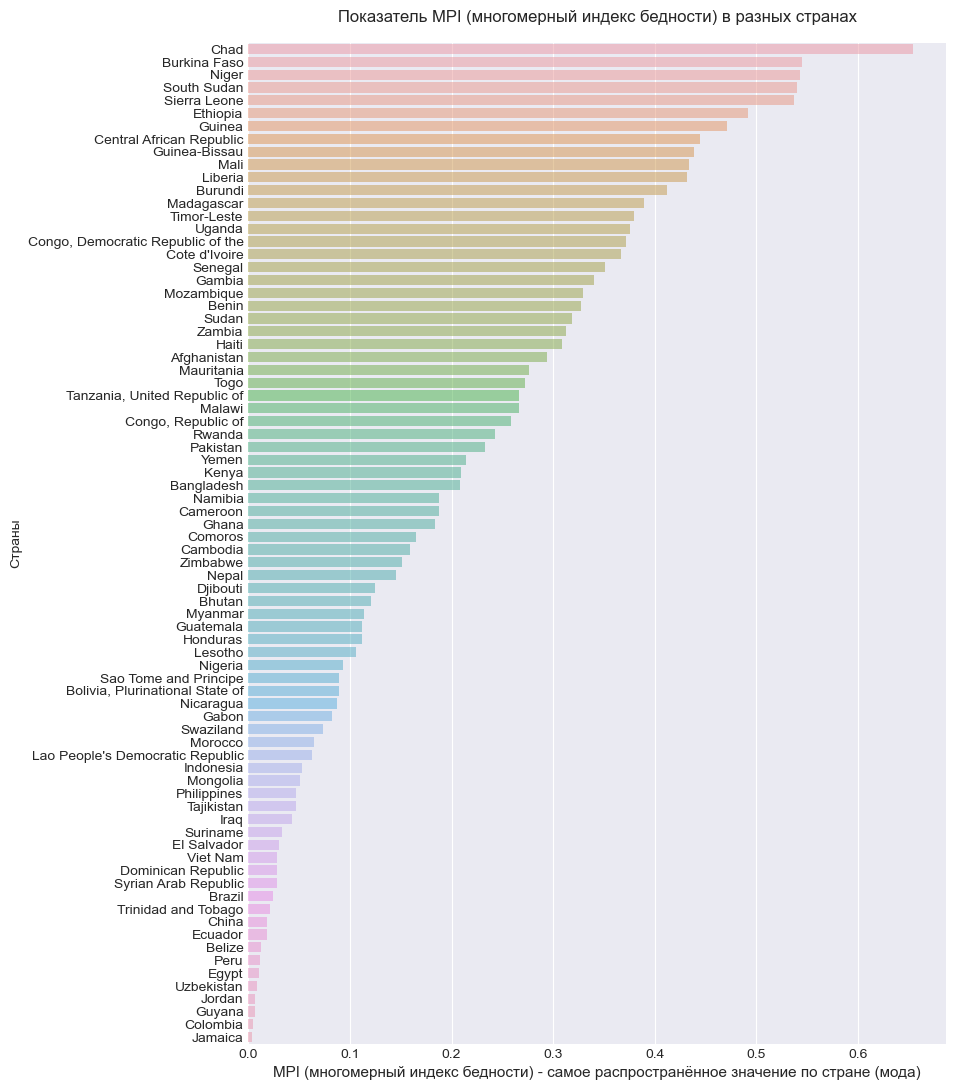

In [16]:
# По моде 

res_3 = df_mpi.groupby(['country'])['MPI'].apply(pd.Series.mode).reset_index()
result_3 = res_3.groupby('country')['MPI'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9, 13))

sns.barplot(x=result_3.values, y=result_3.index, alpha=0.5)
ax.set_title('Показатель MPI (многомерный индекс бедности) в разных странах', pad=15)
ax.set_xlabel('MPI (многомерный индекс бедности) - самое распространённое значение по стране (мода)', fontsize=11)
ax.set_ylabel('Страны')

plt.show()

Построив диаграммы со всеми типами средних, мы видим, что данные каждой диаграммы не одинаковы, 
но в целом близки друг к другу. Например, если мы возьмём первые пять стран (с самым высоким уровнем 
бедности) и последние пять стран (с самым низким уровнем бедности) для каждого из показателей, то 
получится следующее: 

1) Используем среднее арифметическое.
Наиболее бедные - Чад, Буркина Фасо, Нигер, Южный Судан, Эфиопия.
Наименее бедные - Иордания, Ямайка, Узбекистан, Египет, Сирия.

2) Используем медианное значение. 
Наиболее бедные - Чад, Нигер, Эфиопия, Буркина Фасо, Южный Судан.
Наименее бедные - Иордания, Ямайка, Узбекистан, Сирия, Гайана.

3) Используем значение моды. 
Наиболее бедные - Чад, Буркина Фасо, Нигер, Южный Судан, Сьерра Леоне.
Наименее бедные - Ямайка, Колумбия, Гайана, Иордания, Узбекистан.

Наиболее бедные страны практически идентичны для всех трёх показателей, а наименее бедные очень близки 
к этому.

Далее построим диаграмму количества займов в разрезе стран и посмотрим, зависит ли количество займов в стране от уровня бедности.

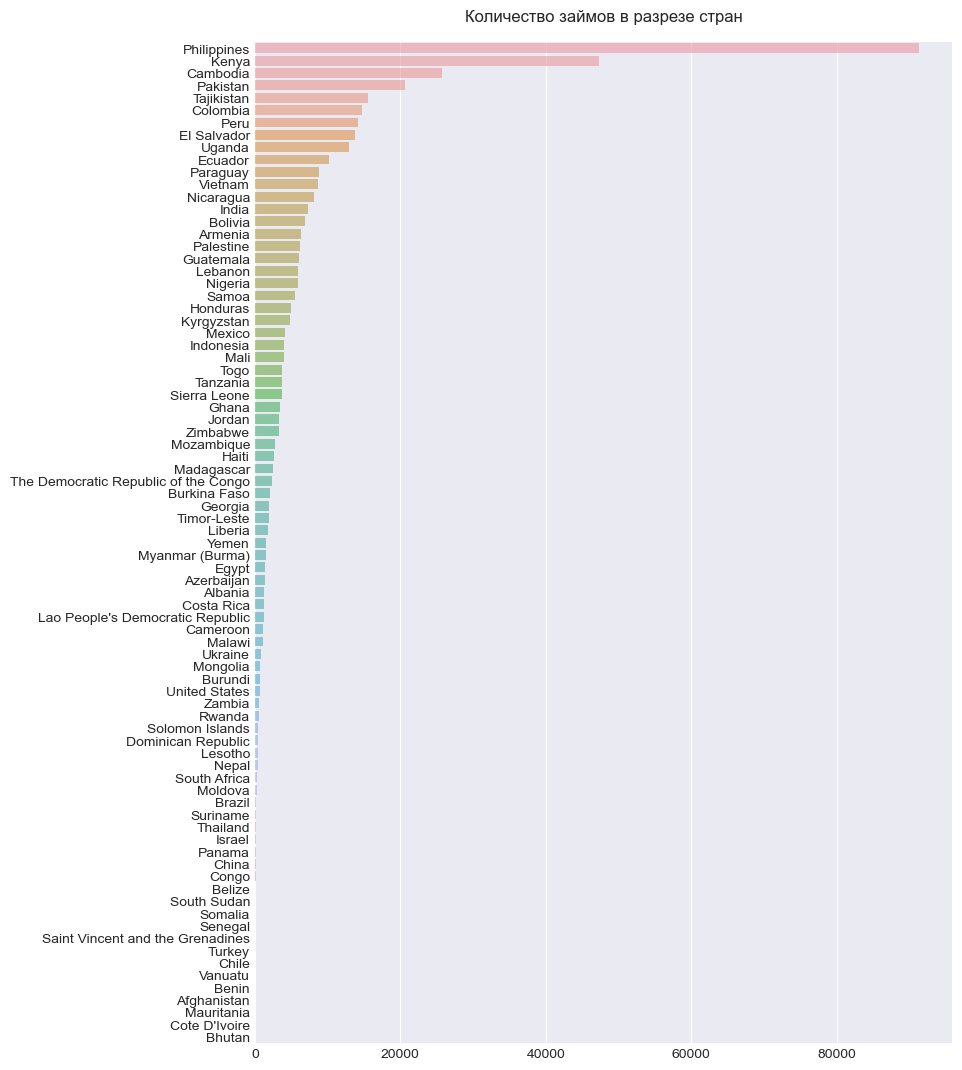

In [17]:
countries_res = df_kiva_loans['country'].value_counts()

plt.figure(figsize=(9, 13))
plt.title('Количество займов в разрезе стран', pad=15)
sns.barplot(y=countries_res.index, x=countries_res.values, alpha=0.6)
plt.show()

Построив диаграмму количества займов в разрезе стран, мы не видим явную зависимость количества займов от 
уровня бедности в стране - страны распределены по-разному. В то же время, нужно иметь в виду, что в разных 
странах существует разная осведомлённость о деятельности компании Kiva, то есть, люди могут нуждаться в займе, 
но не знать о том, что возможность получить его таким способом существует (например, в датасете df_kiva_loans 
нет страны Чад, то есть, по всей видимости, нет заёмщиков из этой страны, а она является одной из самых бедных 
стран).

Попробуем проверить зависимость между медианным значением займа и уровнем бедности.

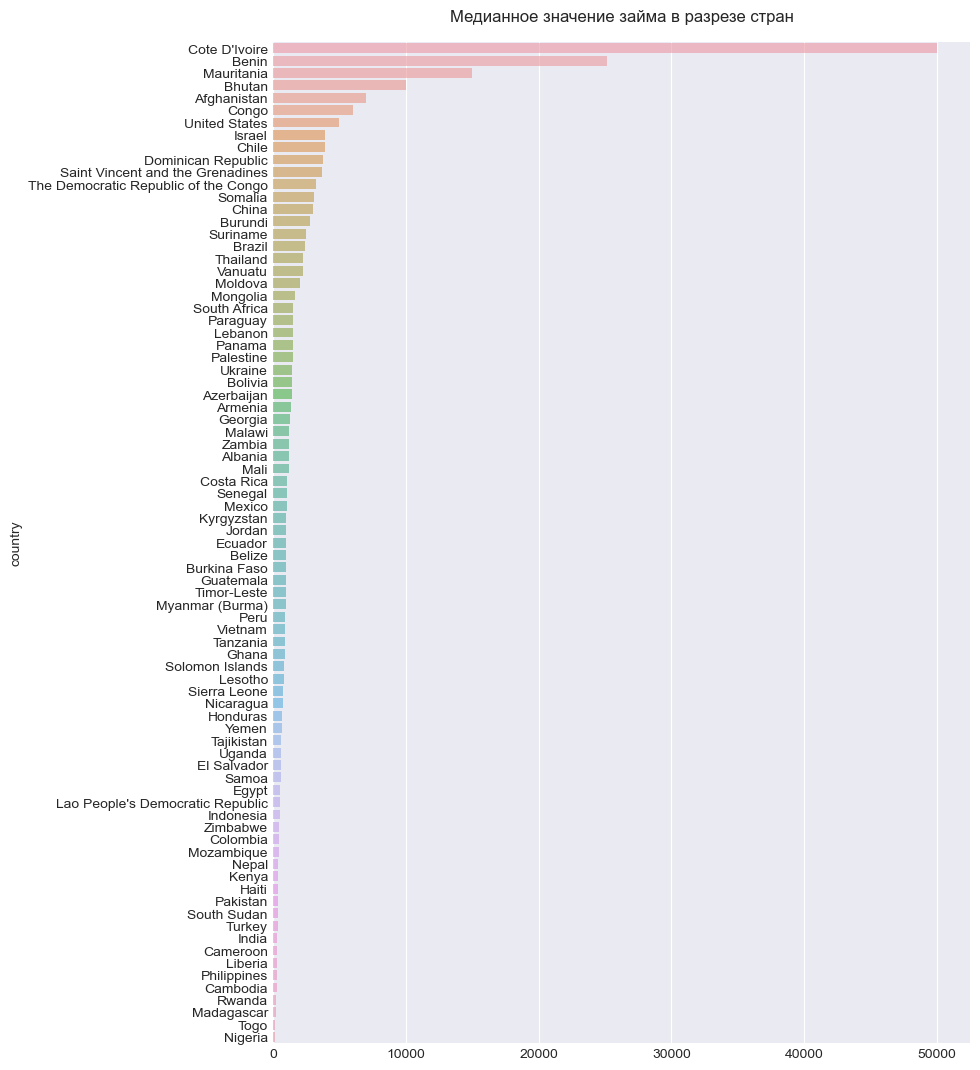

In [19]:
amounts = df_kiva_loans.groupby('country')['loan_amount'].median().sort_values(ascending=False)

plt.figure(figsize=(9, 13))
plt.title('Медианное значение займа в разрезе стран', pad=15)
sns.barplot(y=amounts.index, x=amounts.values, alpha=0.6)
plt.show()

Построив диаграмму медианного значения займа в разрезе стран, зависимость между празнаками становится чуть 
более заметной. Наиболее бедные страны мы чаще видим во второй половине диаграммы, то есть имеющими более 
низкое медианное значение займа. И наоборот, менее бедные страны чаще фигурируют в первой части диаграммы - 
там, где медианное значение займа выше. Это может сказать о том, что в более бедных странах есть потребность 
в небольших займах, часто направленных на удовлетворение первостепенных потребностей - в воде, еде и 
безопасности. В менее бедных странах эти потребности, как правило, удовлетворены у большей части заёмщиков, 
и они чаще берут большие займы для того, чтобы открыть своё дело или расширить производство, создать рабочие 
места или обучить сотрудников. 

Далее изучим гендерную структуру заёмщиков.

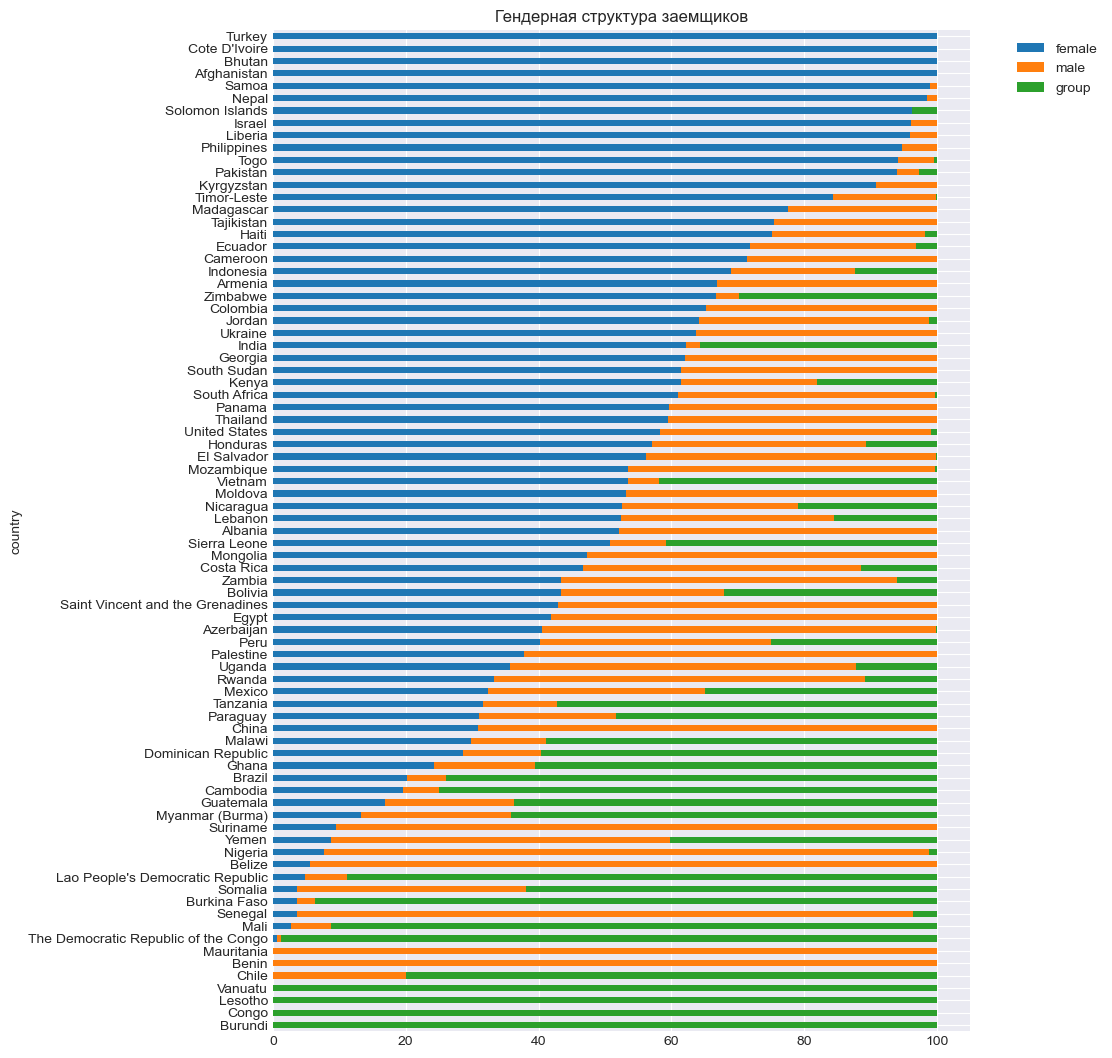

In [20]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female', 'male'] else 
                                     'group' for elem in df_kiva_loans['borrower_genders']]

df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries_res.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

plot = df_gender_by_country.plot.barh(
        figsize=(9, 13)
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.legend(loc=1, bbox_to_anchor=(1.2, 1))
plt.show()

По визуализации выше сложно однозначно сказать, как соотносятся уровень бедности и гендерный состав 
заёмщиков. Например, мы видим практически полное преобладание женщин в таких странах, как Кот-д’Ивуар 
и Бутан, но индекс бедности в них совершенно разный (Кот-д’Ивуар приближается к 0.4, а у Бутана чуть больше 
0.1). 

Такие страны, как Мозамбик и Замбия, Монголия и Египет в гендерном составе 
представлены примерно одинаково (примерно половина женщин и примерно половина мужчин), но у них тоже 
довольно сильно отличается показатель индекса бедности. У Мозамбика и Замбии > 0.3, а у Монголии и Египта 
< 0.1. 

Отдельно стоит отметить группы людей (объединения мужчин и женщин) - в тех странах, где преобладает именно 
эта категория, индекс бедности, в основном, выше. Возможно это связано с тем, что в более бедных странах 
ценится община, совместное ведение хозяйства, воспитание детей и др., поэтому и займы во многом коллективные. 
Также, возможно это связано с тем, что людям из более бедных стран сложнее решиться на такой шаг (взять кредит) 
самостоятельно, нежели находясь в группе людей со схожими потребностями. 

Посмотрим, влияет ли уровень бедности на выбор сектора займа.

In [21]:
by_sector = df_kiva_loans.groupby('country')['sector'].apply(pd.Series.mode).reset_index()
res_mpi = df_mpi.groupby('country')['MPI'].median().reset_index()

df_res = by_sector.merge(res_mpi, how='left', on='country')
df_res.dropna(inplace=True)
main_res = df_res.sort_values('MPI', ascending=False)

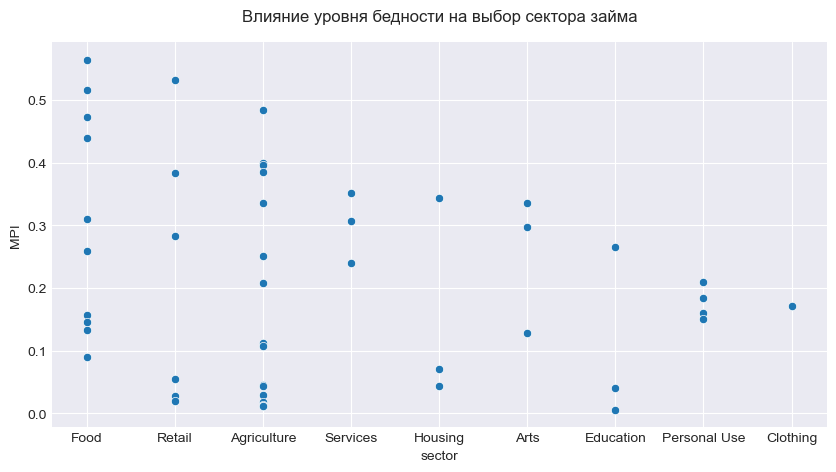

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=main_res, x='sector', y='MPI')
ax.set_title('Влияние уровня бедности на выбор сектора займа', pad=15)

plt.show()

Исходя из построенного точечного графика, можно сделать вывод о том, что в странах с более высоким уровнем 
бедности превалируют такие сектора, как еда, сельское хозяйство и розничная торговля. А в странах, где уровень 
бедности ниже, можно увидеть, что встречаются такие сектора, как образование и искусство. Это даёт нам понимание 
о том, в какой последовательности люди готовы удовлетворять свои потребности, если так можно сказать. То есть, 
пока у людей существует проблема нехватки жизненно необходимых вещей, они вряд ли будут задумываться о культурных 
и духовных ценностях. Это довольно сложно. 

И если рассматривать этот вопрос более глобально, можно предположить, 
что борьба с бедностью способствует повышению общего уровня развития страны, поскольку страна определяется людьми, 
её населяющими, и от благополучия каждого человека и общества в целом в том числе зависит благополучие страны. 
Неслучайно в разрезе многомерного уровня бедности мы видим, в основном, так называемые страны третьего мира. 